### Your name:

<pre> Rishab Kamshetty</pre>

### Collaborators:

<pre>Ashutosh Deowanshi</pre>


##MNIST

Q2. (Optional: 10% Extra Credit) Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.

_Note: It may make the training/text process to take several hours!_

In [0]:

import numpy as np
import os
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

np.random.seed(42)                                                               # makes notebook output reproducible across runs

def sort_by_target(mnist):                                                       # function is required as 'fetch_openml returns' the unsorted MNIST data
    reorder_train = np.array(sorted([(target, i) for i, target in \
                                     enumerate(mnist.target[:60000])]))[:, 1]    # 'sort_by_target' makes the dataset the same as is used in the book
    reorder_test = np.array(sorted([(target, i) for i, target in  \
                                     enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]
    
mnist = fetch_openml('mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8)                                      # fetch_openml() returns targets as strings
sort_by_target(mnist)                                                            # fetch_openml() returns an unsorted dataset

X, y = mnist["data"], mnist["target"]
print('Shape of MNIST data: ', X.shape)
print('Shape of MNIST target data: ', y.shape)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Shape of MNIST data:  (70000, 784)
Shape of MNIST target data:  (70000,)


The digit below has the target value of 9


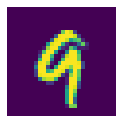

In [0]:

def plot_digit(image):                                                           # function to plot digits, each consists of a 28x28 pixel array which we must shift
    image = image.reshape((28, 28))
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    plt.axis('off')

plot_digit(X_train[40000])
print('The digit below has the target value of', y_train[40000])

In [0]:
def shift_mnist_images(direction, X_train):
    X_train_shift = np.copy(X_train)
    if direction == 'up':
        shift_vert = -1
        shift_horiz = 0
    elif direction == 'down':
        shift_vert = 1
        shift_horiz = 0
    elif direction == 'left':
        shift_vert = 0
        shift_horiz = -1
    elif direction == 'right':
        shift_vert = 0
        shift_horiz = 1
    for i in range(len(X_train_shift)):
        image = X_train_shift[i]
        image = image.reshape((28,28))
        image = np.roll(image, (shift_vert, shift_horiz), axis=(0,1))
        image = image.reshape(784,)
        X_train_shift[i] = image
    return(X_train_shift)

print(X_train.shape, 'is the shape of the original training set.')
print(y_train.shape, 'is the shape of the original training targets.\n')
X_train_up = shift_mnist_images('up', X_train)
X_train_down = shift_mnist_images('down', X_train)
X_train_left = shift_mnist_images('left', X_train)
X_train_right = shift_mnist_images('right', X_train)

X_train_aug = np.concatenate([X_train, X_train_up, X_train_down, X_train_left,
                             X_train_right])
y_train_aug = np.concatenate([y_train, y_train, y_train, y_train, y_train])
print(X_train_aug.shape, 'is the shape of the augmented training set.')
print(y_train_aug.shape, 'is the shape of the augmented training targets.')

(60000, 784) is the shape of the original training set.
(60000,) is the shape of the original training targets.

(300000, 784) is the shape of the augmented training set.
(300000,) is the shape of the augmented training targets.


In [0]:
knn_clf = KNeighborsClassifier(n_neighbors = 4)

In [0]:
knn_clf.fit(X_train_aug, y_train_aug)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
from sklearn.metrics import accuracy_score
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9756

### Submit your notebook

Submit your solution on Canvas